In [ ]:
# This notebook has been intentionally minimized.
# Please use the ICS scripts instead:
#   Train/evaluate: python -m src.ics_eval --data-dir data --epochs 8
#   Run ICS:        python -m src.ics_cli --incident-image path\to\incident.jpg --model-arch bn


In [3]:
print(img_array)

[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


In [4]:
print(img_array.shape)

(375, 500)


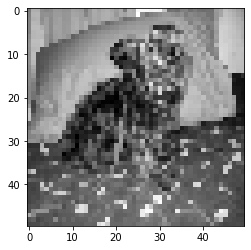

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

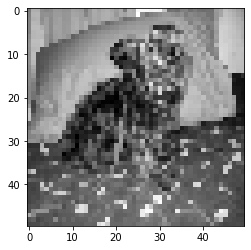

In [6]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12501/12501 [00:42<00:00, 296.58it/s]

24946


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
0
1
1
0
1


In [19]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)


X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

In [11]:
np.shape(X)

(24946, 50, 50, 1)

In [27]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [35]:
import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [20]:
y=np.array(y)
X= X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=16, epochs=30, validation_split=0.3)

Train on 17462 samples, validate on 7484 samples
Epoch 1/30
17462/17462 [==============================] - 10s 575us/sample - loss: 0.6722 - accuracy: 0.5912 - val_loss: 0.6617 - val_accuracy: 0.6028
Epoch 2/30
17462/17462 [==============================] - 10s 553us/sample - loss: 0.6443 - accuracy: 0.6336 - val_loss: 0.6377 - val_accuracy: 0.6493
Epoch 3/30
17462/17462 [==============================] - 10s 554us/sample - loss: 0.5953 - accuracy: 0.6888 - val_loss: 0.5840 - val_accuracy: 0.6931
Epoch 4/30
17462/17462 [==============================] - 10s 557us/sample - loss: 0.5559 - accuracy: 0.7197 - val_loss: 0.5650 - val_accuracy: 0.7159
Epoch 5/30
17462/17462 [==============================] - 10s 559us/sample - loss: 0.5346 - accuracy: 0.7363 - val_loss: 0.5466 - val_accuracy: 0.7266
Epoch 6/30
17462/17462 [==============================] - 10s 554us/sample - loss: 0.5130 - accuracy: 0.7489 - val_loss: 0.5663 - val_accuracy: 0.7133
Epoch 7/30
17462/17462 [=====================

In [37]:
model.save('trained_model1')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: trained_model1\assets


In [23]:
sample=X[-13:-1]
sample = np.array(sample).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
np.shape(sample)

(12, 50, 50, 1)

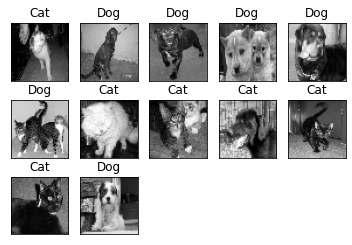

In [28]:
fig=plt.figure()
mm=[]
num=0
for data in sample:
    num=num+1

    img_data = data
    type(data)
    
    y = fig.add_subplot(3,5,num)
    orig = img_data.reshape(IMG_SIZE,IMG_SIZE)
    data = img_data.reshape(-1,IMG_SIZE,IMG_SIZE,1)
    mm.append(model.predict(data))


    
    if mm[num-1] > 0.49: str_label='Cat'
    else: str_label='Dog'
        
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)